<a href="https://colab.research.google.com/github/arnabsaha7/Customer-Churn_Prediction---Analysis/blob/main/Customer_Churn_Prediction_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Shopping Trends Analysis & Customer Churn Prediction**
>## author: **Arnab Saha**

## **Walkthrough:**
>- Libraries
>- Data Loading & Pre-processing
>- Statistical Analysis
> - Graphical Analysis
>- Valuable Insights
>- Customer Churn Prediction

# **Libraries Import**

In [1]:
# Libraries for Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind
from scipy.stats import f_oneway
import statsmodels.api as sm
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Libraries for Model Building
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

# Data

In [3]:
df = pd.read_csv('/content/shopping_trends_updated.csv')

In [4]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
df.shape

(3900, 18)

In [6]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

# **Statistical Analysis**

In [7]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [9]:
print("Null count: ", df.isnull().sum().value_counts())
print("Duplicate Count: ", df.duplicated().sum())

Null count:  0    18
dtype: int64
Duplicate Count:  0


In [10]:
df.nunique()

Customer ID               3900
Age                         53
Gender                       2
Item Purchased              25
Category                     4
Purchase Amount (USD)       81
Location                    50
Size                         4
Color                       25
Season                       4
Review Rating               26
Subscription Status          2
Shipping Type                6
Discount Applied             2
Promo Code Used              2
Previous Purchases          50
Payment Method               6
Frequency of Purchases       7
dtype: int64

In [11]:
# Summary Statistics
summary_status = df.describe()
print(summary_status)

       Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000  


In [12]:
# Missing values
missing_values = df.isnull().sum()
print(missing_values)

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


In [13]:
# Correlation Analysis
correlation_matrix = df[['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']].corr()
print(correlation_matrix)

                            Age  Purchase Amount (USD)  Review Rating  \
Age                    1.000000              -0.010424      -0.021949   
Purchase Amount (USD) -0.010424               1.000000       0.030776   
Review Rating         -0.021949               0.030776       1.000000   
Previous Purchases     0.040445               0.008063       0.004229   

                       Previous Purchases  
Age                              0.040445  
Purchase Amount (USD)            0.008063  
Review Rating                    0.004229  
Previous Purchases               1.000000  


In [14]:
# Hypothesis Testing

group_a = df[df['Gender'] == 'Male']['Purchase Amount (USD)']
group_b = df[df['Gender'] == 'Female']['Purchase Amount (USD)']

t_statistic, p_value = ttest_ind(group_a, group_b, equal_var=False)
print(f"T-statistic: {t_statistic}\nP-value: {p_value}")


T-statistic: -0.8821375008076587
P-value: 0.37778797606119197


In [15]:
# ANOVA for multivalued Column groups
category_groups = [df[df['Category'] == category]['Purchase Amount (USD)']
                   for category in df['Category'].unique()]

f_statistic, p_value_anova = f_oneway(*category_groups)
print(f"F-statistic: {f_statistic}\nP-value (ANOVA): {p_value_anova}")


F-statistic: 1.4536190218138958
P-value (ANOVA): 0.225219398858934


In [16]:
# Regression Analysis
X = df[['Age', 'Review Rating']]
X = sm.add_constant(X)
y = df['Purchase Amount (USD)']

model = sm.OLS(y, X).fit()
print(model.summary())


                              OLS Regression Results                             
Dep. Variable:     Purchase Amount (USD)   R-squared:                       0.001
Model:                               OLS   Adj. R-squared:                  0.001
Method:                    Least Squares   F-statistic:                     2.033
Date:                   Mon, 08 Jan 2024   Prob (F-statistic):              0.131
Time:                           17:38:15   Log-Likelihood:                -17874.
No. Observations:                   3900   AIC:                         3.575e+04
Df Residuals:                       3897   BIC:                         3.577e+04
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           

# **Graphical Analysis**

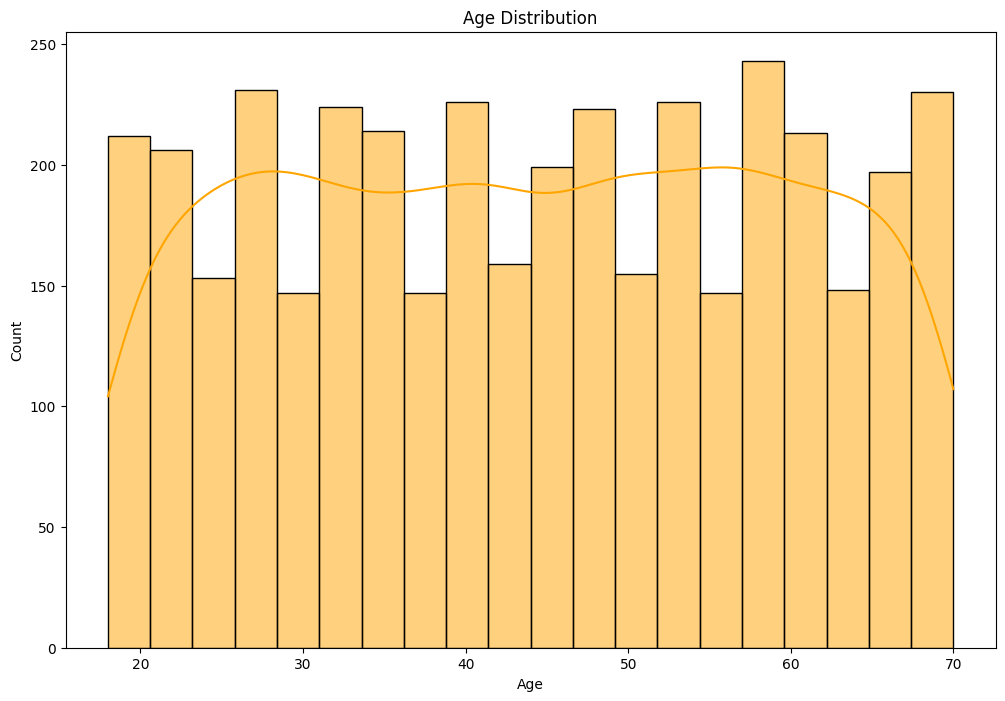

In [17]:
plt.figure(figsize=(12,8))
sns.histplot(df['Age'], bins=20, kde=True, color='orange')
plt.title("Age Distribution")
plt.show()

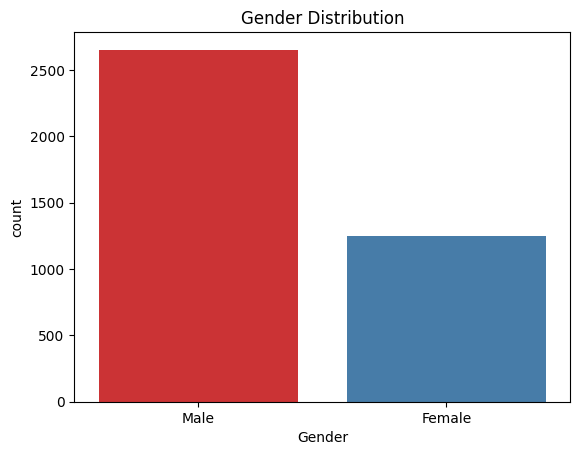

In [18]:
sns.countplot(x='Gender', data=df, palette='Set1')
plt.title("Gender Distribution")
plt.show()

## Countplot for all the Categorical Columns

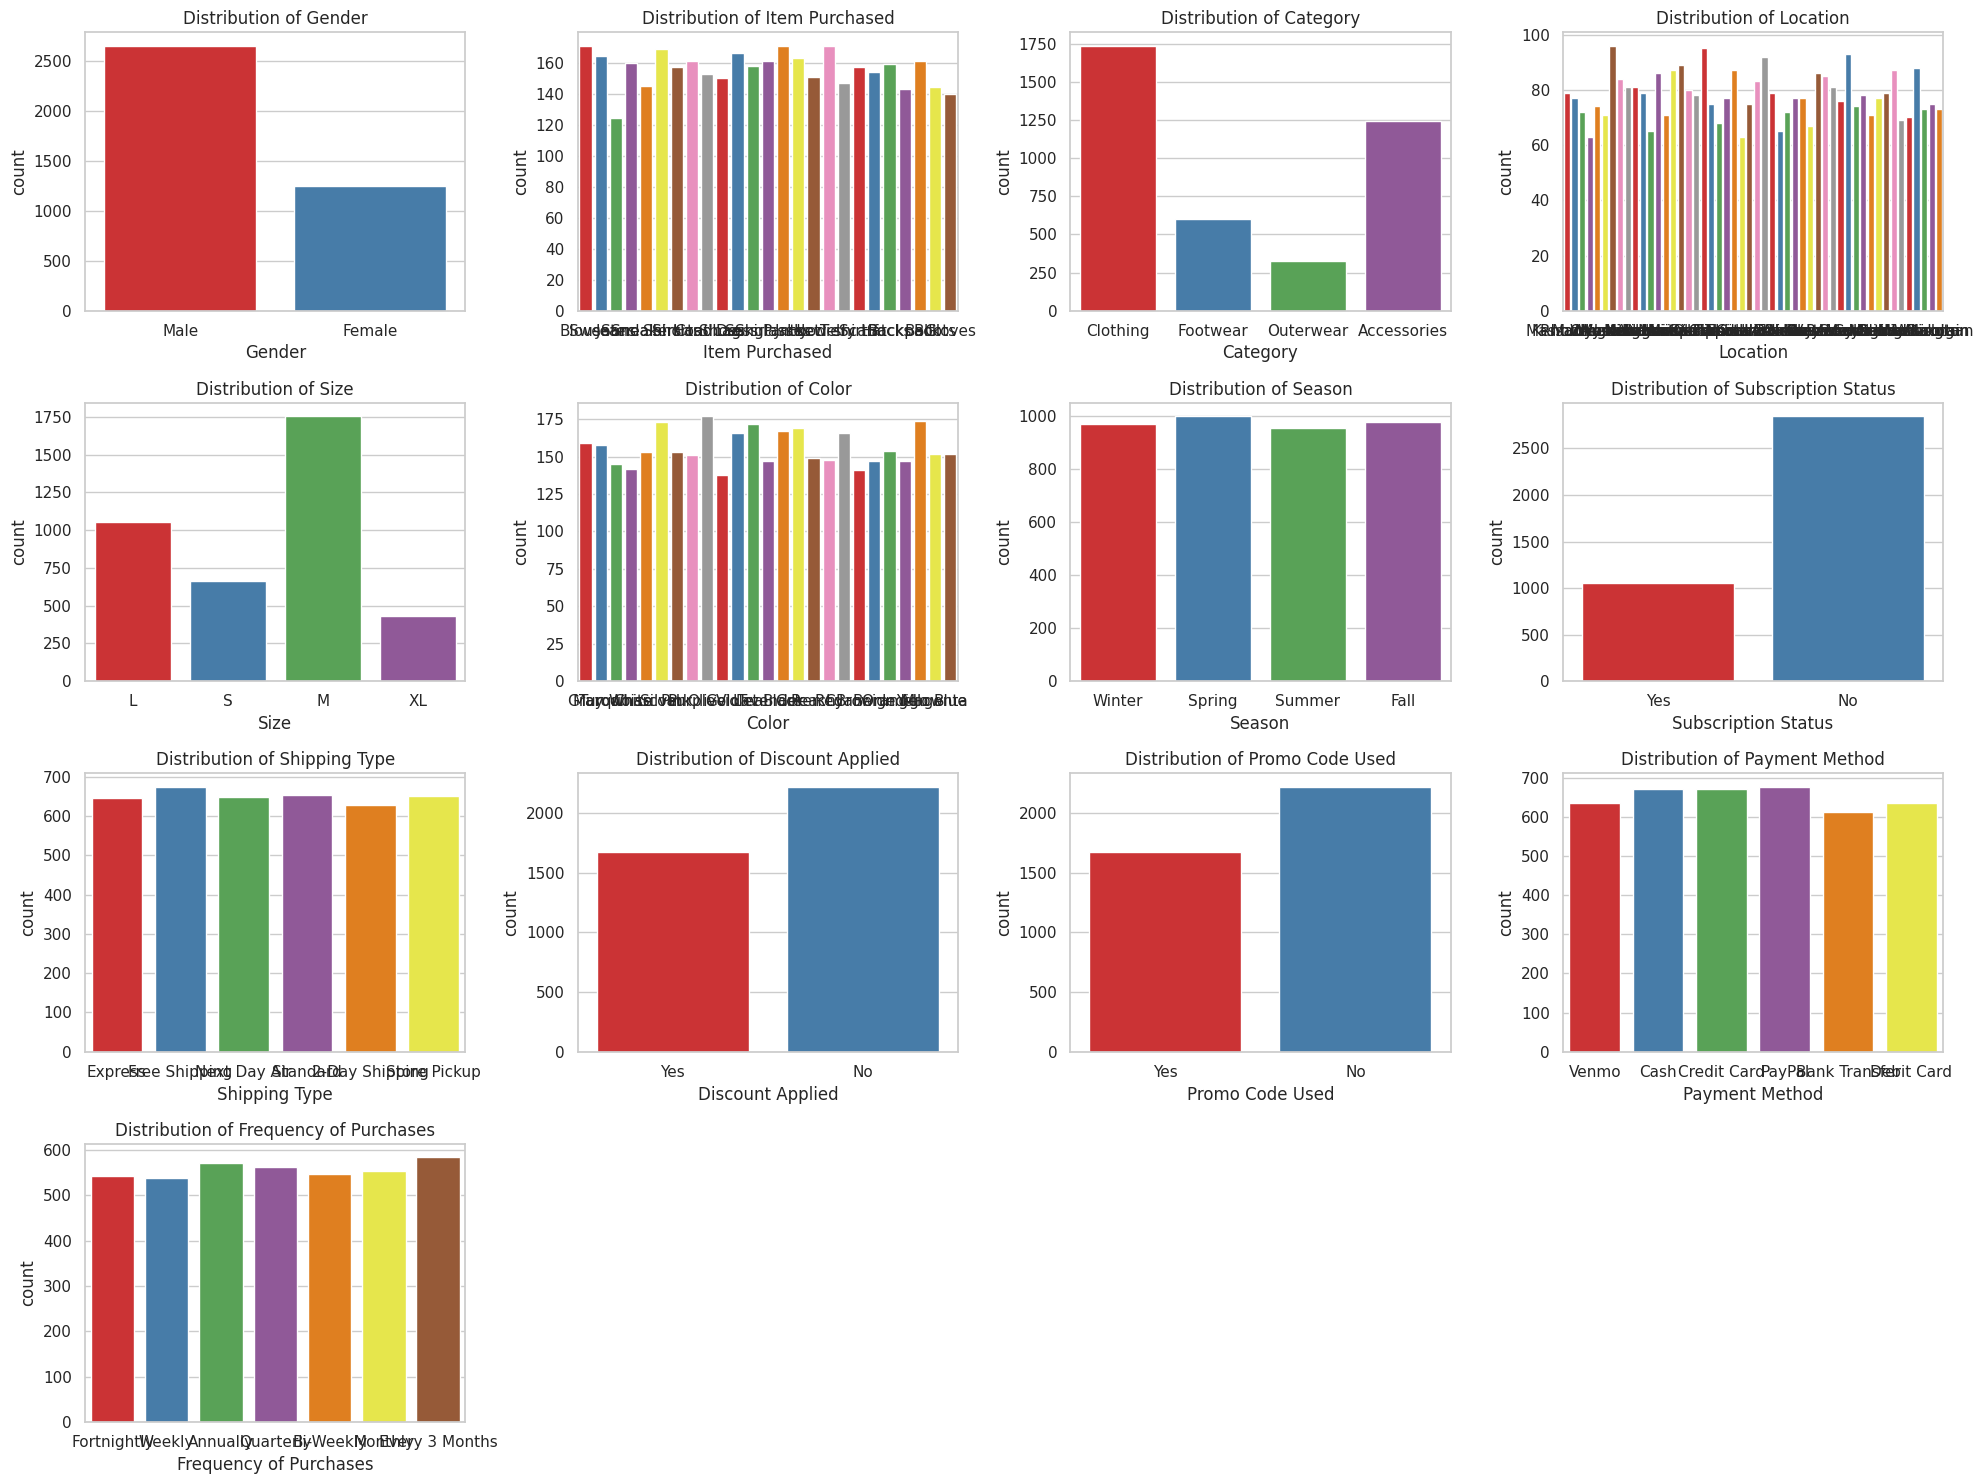

In [19]:
sns.set(style='whitegrid')
plt.figure(figsize=(20,15))

# Categorical variables
categorical_columns = ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season',
                        'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used',
                        'Payment Method', 'Frequency of Purchases']

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 4, i)
    sns.countplot(x=column, data=df, palette='Set1')
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

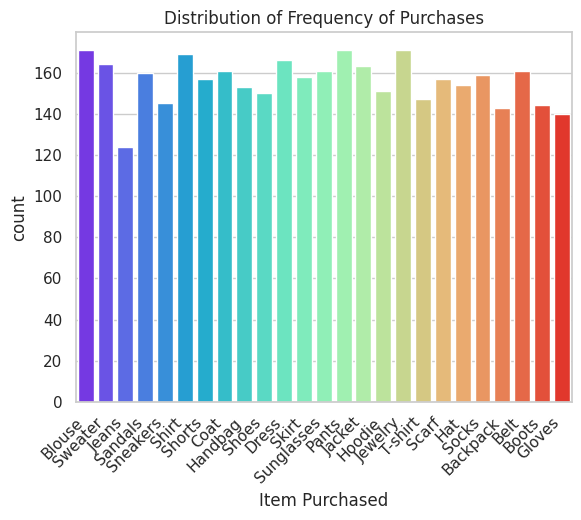

In [20]:
# Distribution of Item Purchased
sns.countplot(x='Item Purchased', data=df, palette='rainbow')
plt.title(f'Distribution of {column}')
plt.xticks(rotation=45, ha='right')
plt.show()

## Histogram for all Numerical Columns

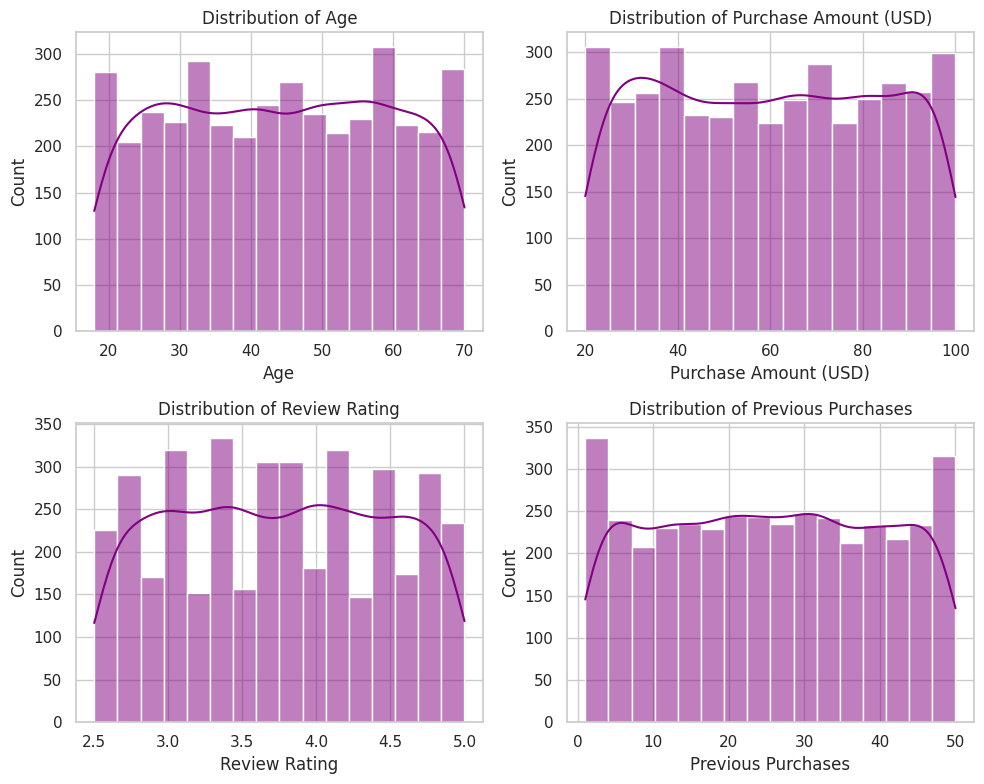

In [21]:
# Numerical variables
sns.set(style='whitegrid')
plt.figure(figsize=(10,8))

numerical_columns = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[column], kde=True, color='purple')
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

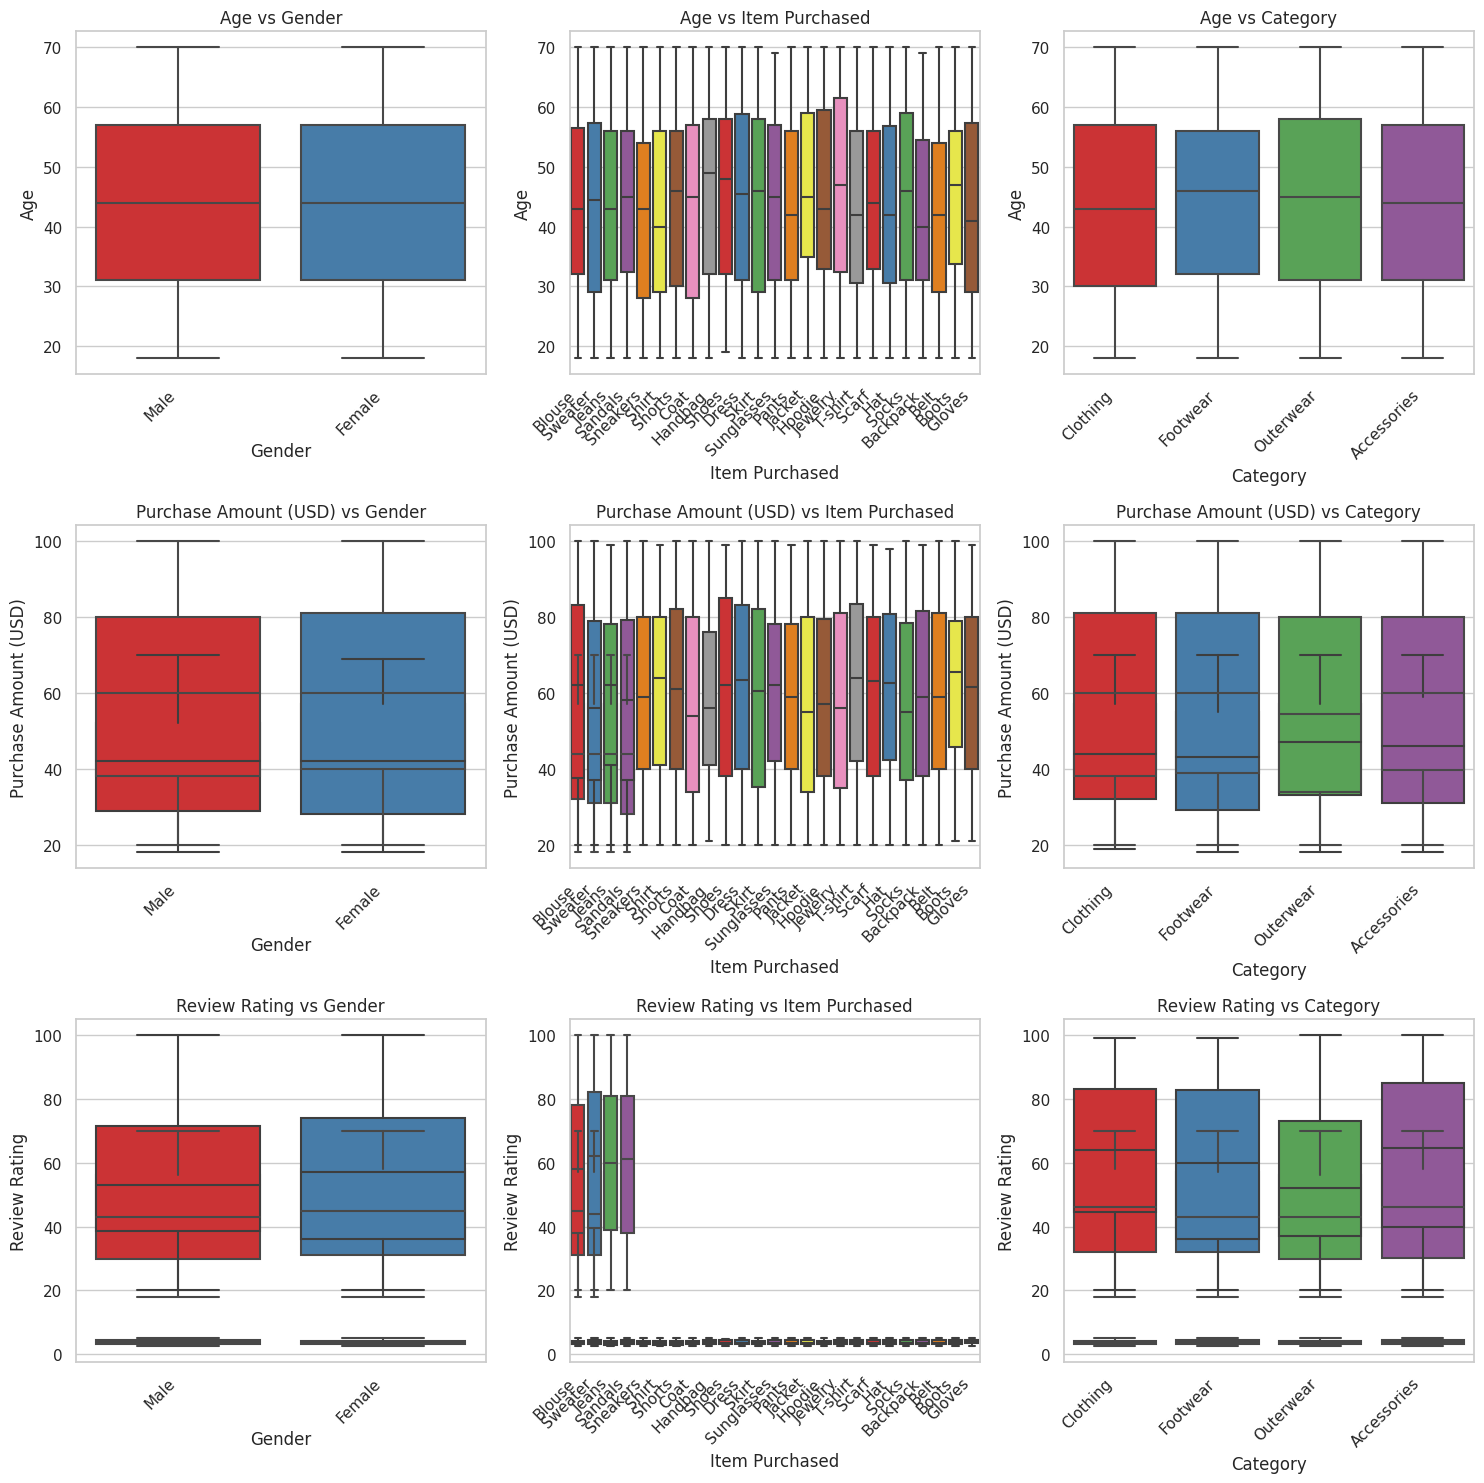

In [22]:
sns.set(style="whitegrid")
num_rows = 3
num_cols = 3
plt.figure(figsize=(15, 15))

for i, numerical_column in enumerate(numerical_columns, 1):
    for j, categorical_column in enumerate(categorical_columns, 1):
        subplot_idx = (i-1) * num_cols + j
        if subplot_idx <= num_rows * num_cols:  # Ensure that the subplot index is within the valid range
            plt.subplot(num_rows, num_cols, subplot_idx)
            sns.boxplot(x=categorical_column, y=numerical_column, data=df, palette='Set1')
            plt.xticks(rotation=45, ha='right')
            plt.title(f'{numerical_column} vs {categorical_column}')

plt.tight_layout()
plt.show()

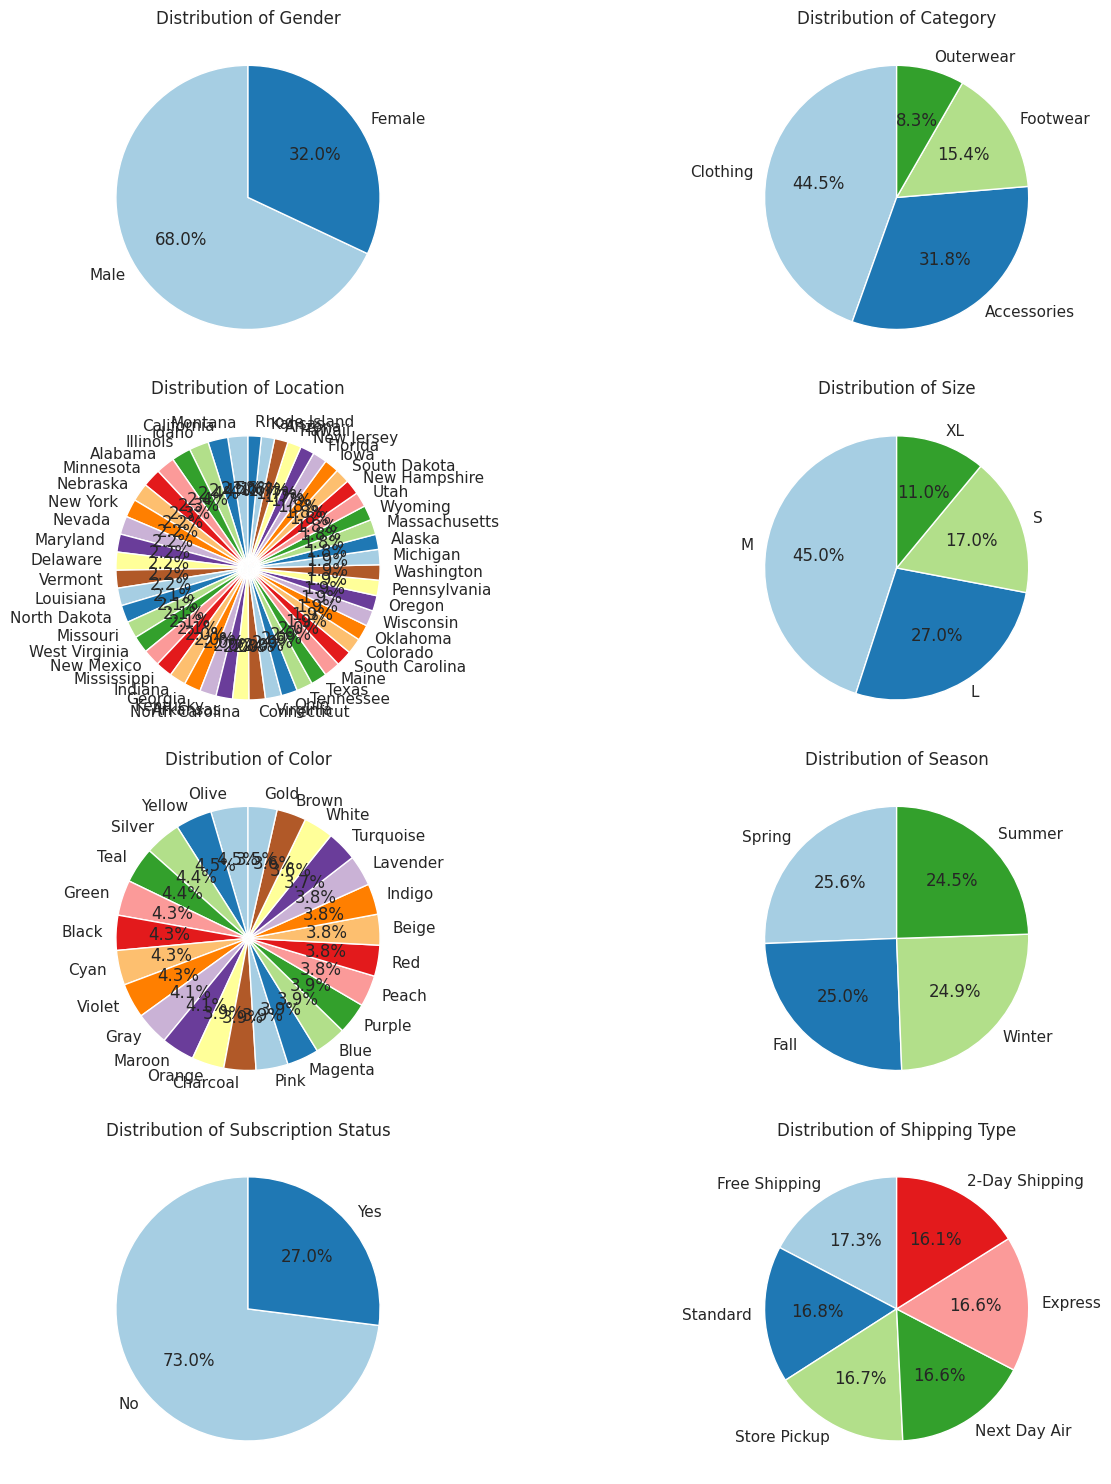

In [23]:
# Categorical variables for pie charts
pie_chart_columns = ['Gender', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Shipping Type']

# Set up subplots for pie charts
num_rows = len(pie_chart_columns) // 2 + len(pie_chart_columns) % 2
num_cols = 2

plt.figure(figsize=(15, 15))

# Plot pie charts
for i, column in enumerate(pie_chart_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    value_counts = df[column].value_counts()
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

In [24]:
df["Category"].value_counts()

Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: Category, dtype: int64

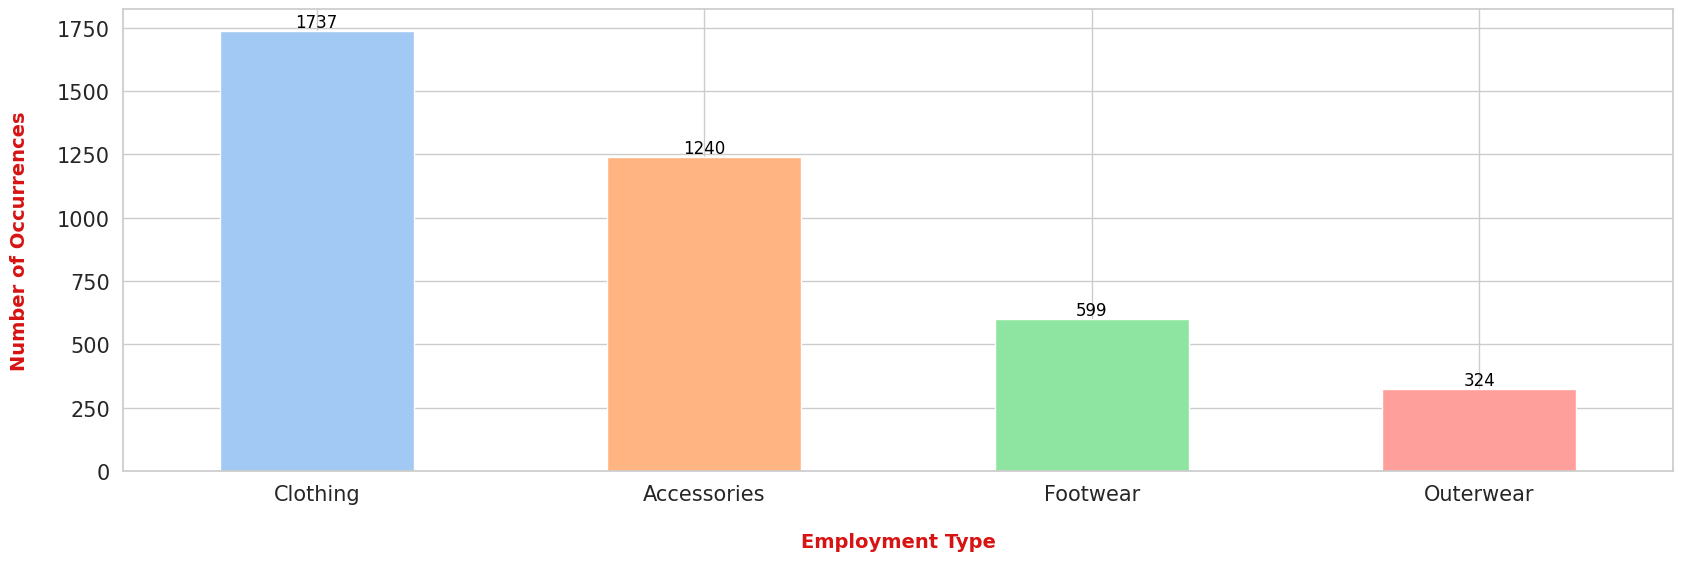

In [25]:
plt.figure(figsize = (20, 6))
bar_plot_colors = sns.color_palette("pastel", len(df['Category']))
ax = df["Category"].value_counts().plot(kind = 'bar', color = bar_plot_colors, rot = 0)
ax.set_xticklabels(('Clothing', 'Accessories', 'Footwear', 'Outerwear'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Employment Type', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

In [26]:
df["Location"].value_counts()

Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
West Virginia     81
New Mexico        81
Mississippi       80
Indiana           79
Georgia           79
Kentucky          79
Arkansas          79
North Carolina    78
Connecticut       78
Virginia          77
Ohio              77
Tennessee         77
Texas             77
Maine             77
South Carolina    76
Colorado          75
Oklahoma          75
Wisconsin         75
Oregon            74
Pennsylvania      74
Washington        73
Michigan          73
Alaska            72
Massachusetts     72
Wyoming           71
Utah              71
New Hampshire     71
South Dakota      70
Iowa              69
Florida           68
New Jersey        67
Hawaii            65
Arizona      

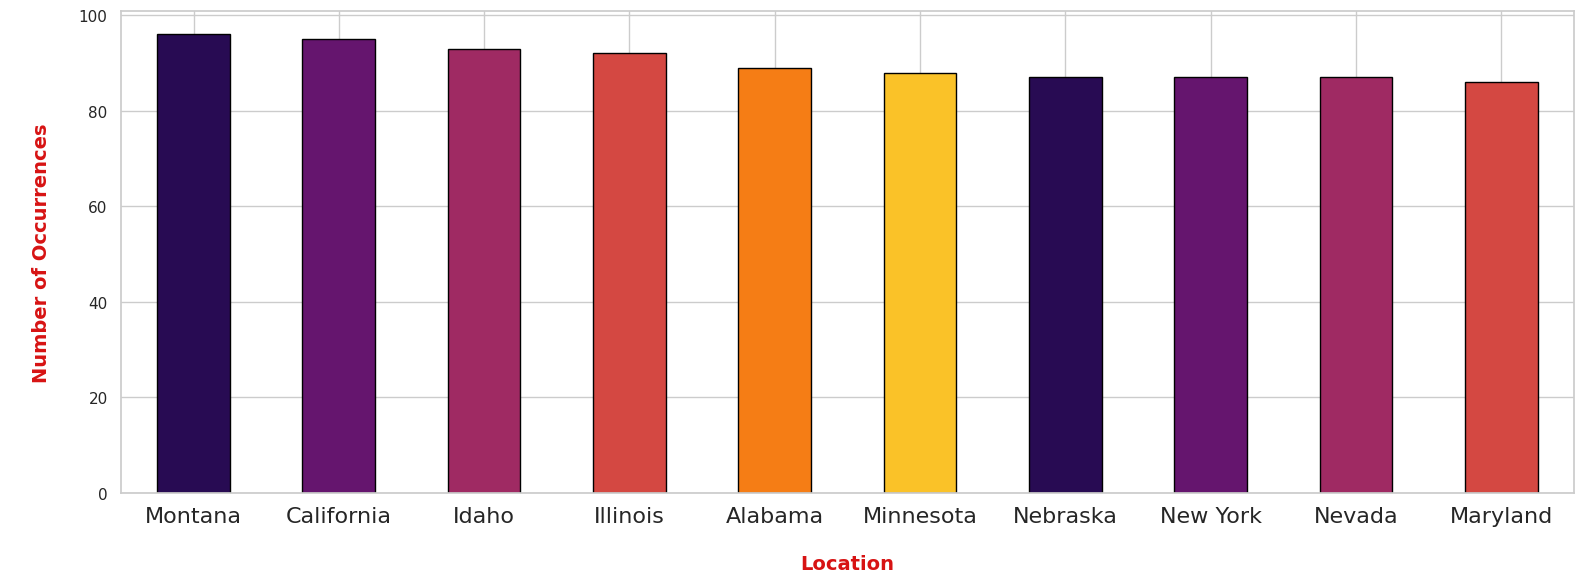

In [27]:
plt.figure(figsize = (16, 6))
df["Location"].value_counts()[:10].sort_values(ascending = False).plot(kind = 'bar', color = sns.color_palette('inferno'), edgecolor = 'black')
plt.xlabel('Location', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('\nNumber of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

In [28]:
df["Size"].value_counts()

M     1755
L     1053
S      663
XL     429
Name: Size, dtype: int64

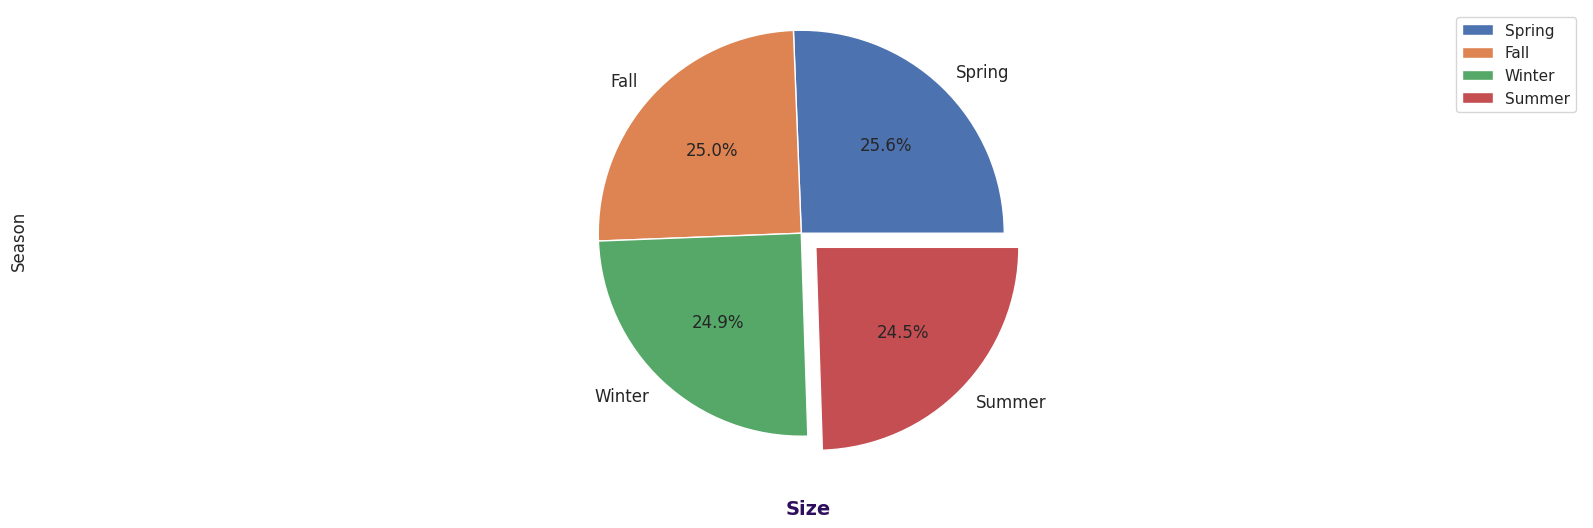

In [29]:
plt.figure(figsize = (20, 6))

counts = df["Season"].value_counts()
explode = (0, 0.0, 0.0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [30]:
df["Subscription Status"].value_counts()

No     2847
Yes    1053
Name: Subscription Status, dtype: int64

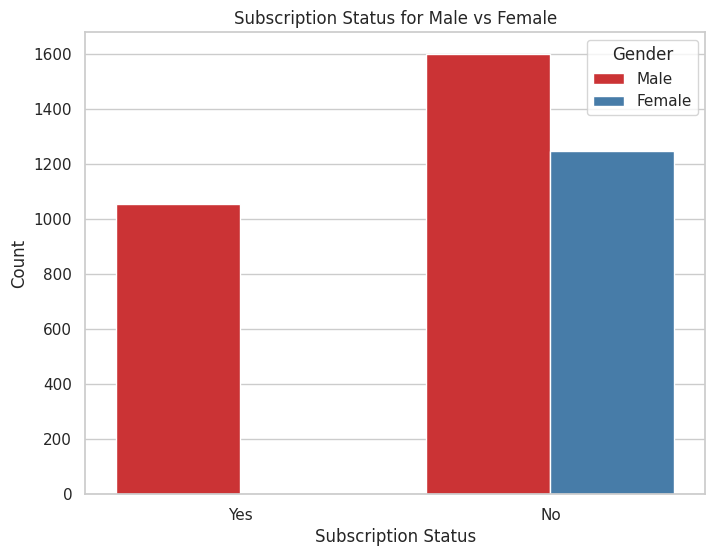

In [31]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(x='Subscription Status', hue='Gender', data=df, palette='Set1')
plt.title('Subscription Status for Male vs Female')
plt.xlabel('Subscription Status')
plt.ylabel('Count')
plt.show()

In [32]:
df["Payment Method"].value_counts()

PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: Payment Method, dtype: int64

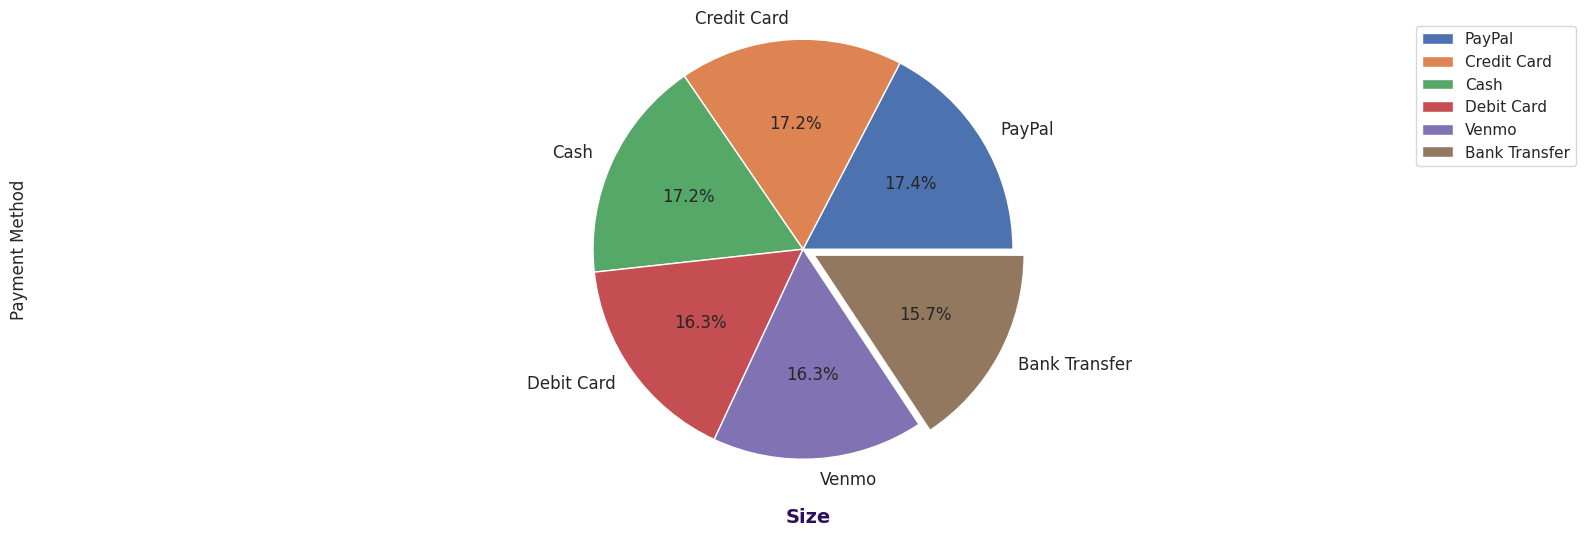

In [33]:
plt.figure(figsize = (20, 6))

counts = df["Payment Method"].value_counts()
explode = (0, 0, 0, 0, 0.0, 0.06)

counts.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

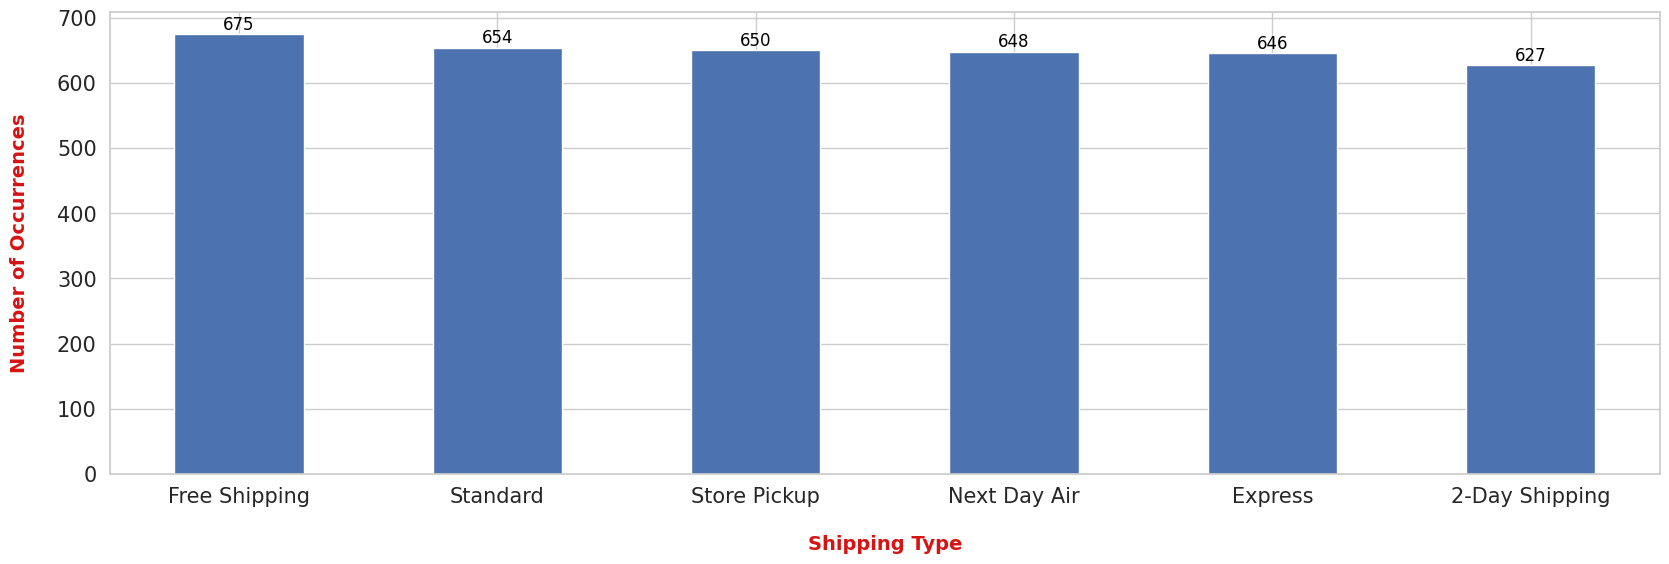

In [34]:
plt.figure(figsize = (20, 6))
ax = df["Shipping Type"].value_counts().plot(kind = 'bar', rot = 0)
ax.set_xticklabels(('Free Shipping', 'Standard', 'Store Pickup', 'Next Day Air', 'Express', '2-Day Shipping'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Shipping Type', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

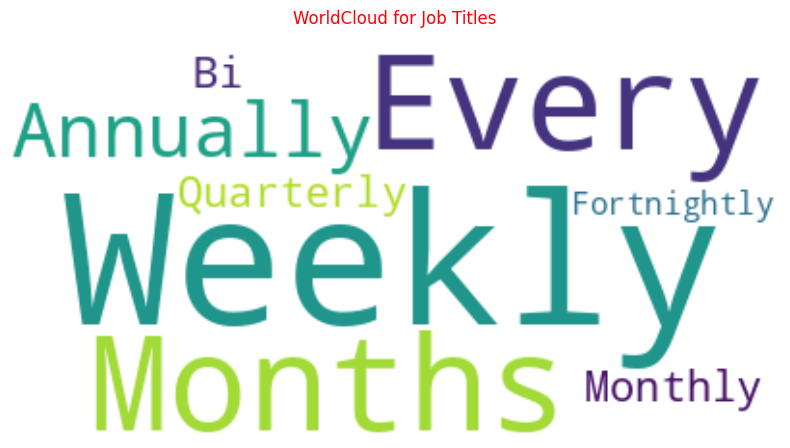

In [35]:
text = " ".join(title for title in df["Frequency of Purchases"])
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize = (20, 5))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis("off")
plt.title('WorldCloud for Job Titles\n', fontsize = 12, color = "#FF0000")
plt.show()


In [36]:
df["Frequency of Purchases"].value_counts()

Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: Frequency of Purchases, dtype: int64

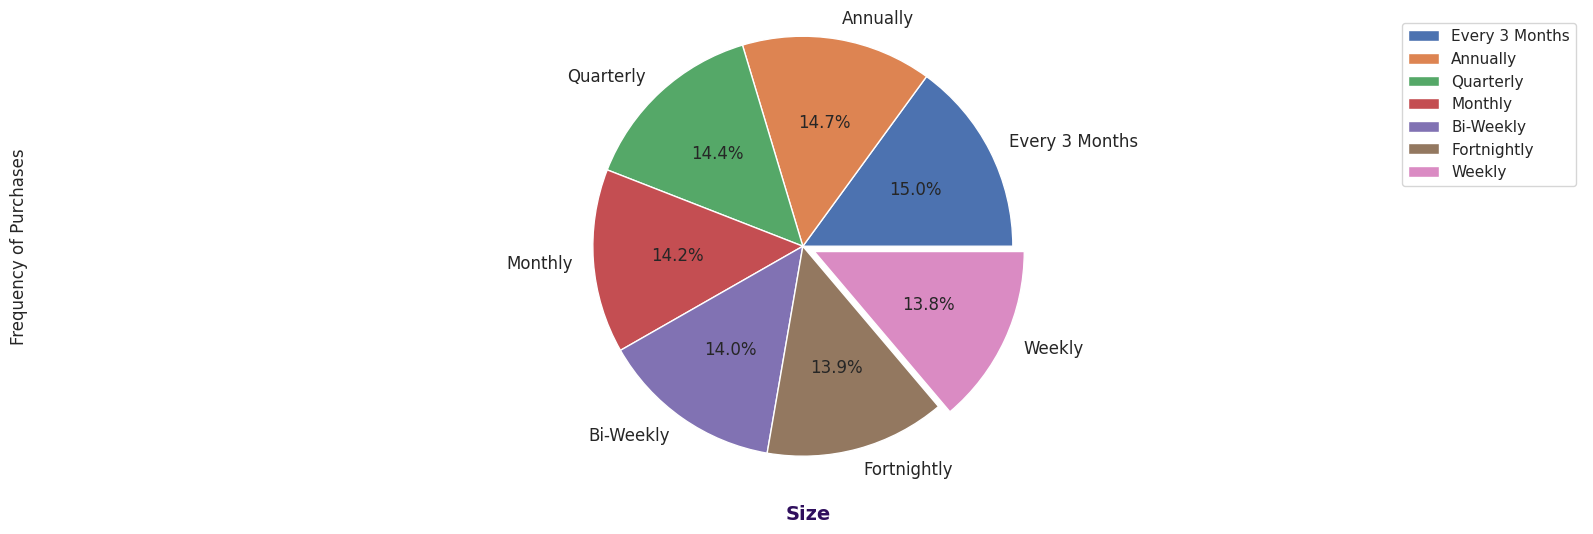

In [37]:
plt.figure(figsize = (20, 6))

counts = df["Frequency of Purchases"].value_counts()
explode = (0, 0, 0, 0, 0.0, 0, 0.06)

counts.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

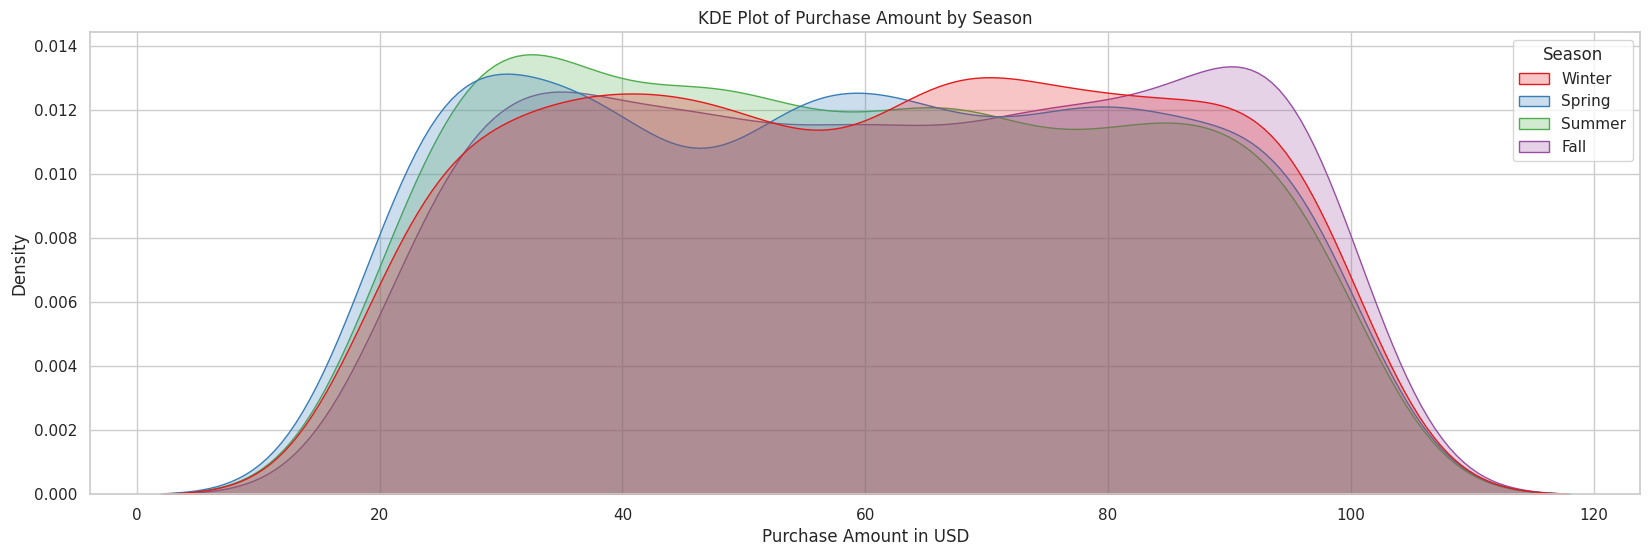

In [38]:
plt.figure(figsize=(20, 6))
sns.kdeplot(data = df, x = 'Purchase Amount (USD)',
            hue = 'Season', common_norm = False, fill = True, palette = 'Set1')
plt.title('KDE Plot of Purchase Amount by Season')
plt.xlabel('Purchase Amount in USD')
plt.show()

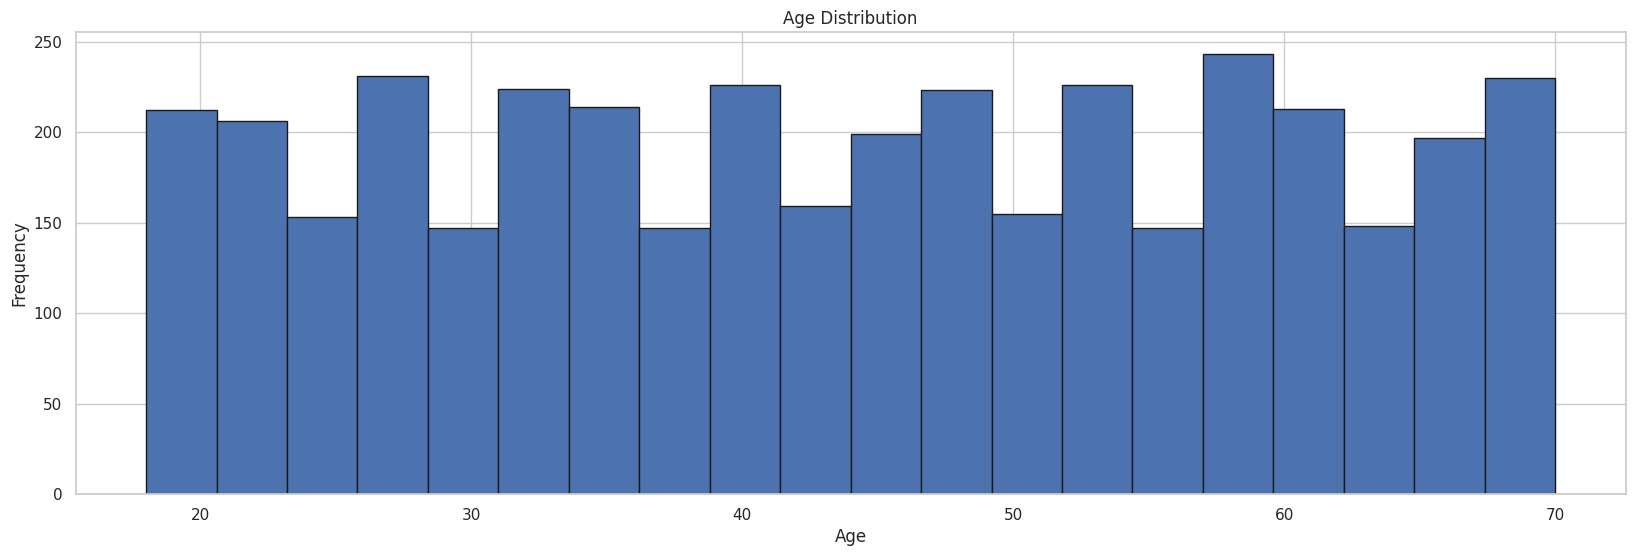

In [39]:
# Histogram of Age Distribution
plt.figure(figsize = (20, 6))
plt.hist(df['Age'], bins = 20, edgecolor = 'k')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

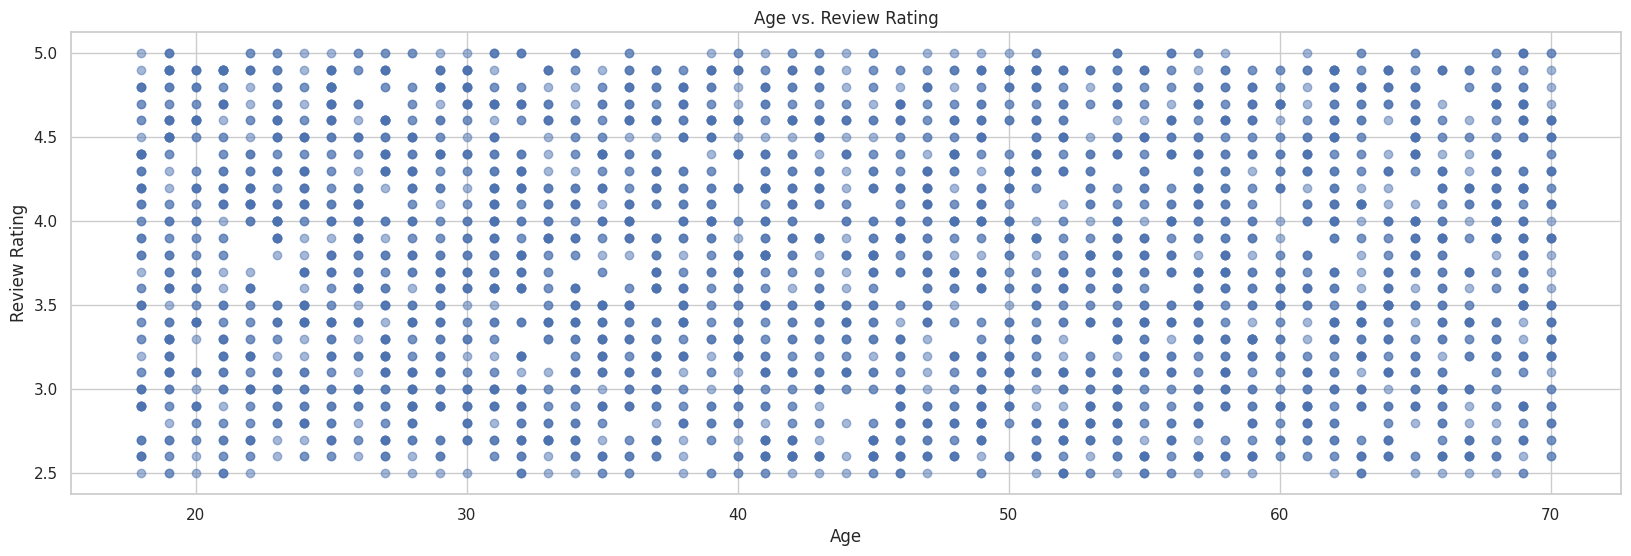

In [40]:
# Scatter Plot of Age vs. Review Rating
plt.figure(figsize = (20, 6))
plt.scatter(df['Age'], df['Review Rating'], alpha=0.5)
plt.title('Age vs. Review Rating')
plt.xlabel('Age')
plt.ylabel('Review Rating')
plt.show()

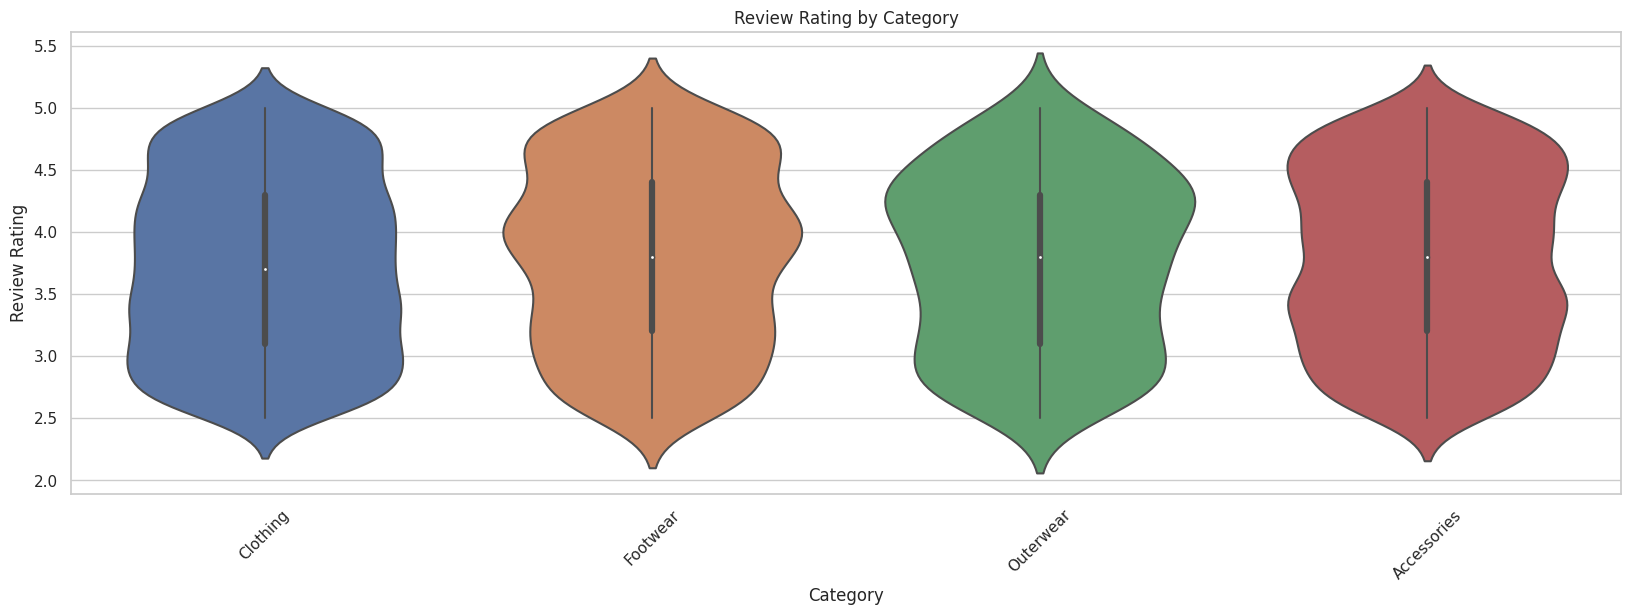

In [41]:
# Violin Plot of Review Rating by Category
plt.figure(figsize=(20, 6))
sns.violinplot(x='Category', y='Review Rating', data=df)
plt.title('Review Rating by Category')
plt.xlabel('Category')
plt.ylabel('Review Rating')
plt.xticks(rotation=45)
plt.show()

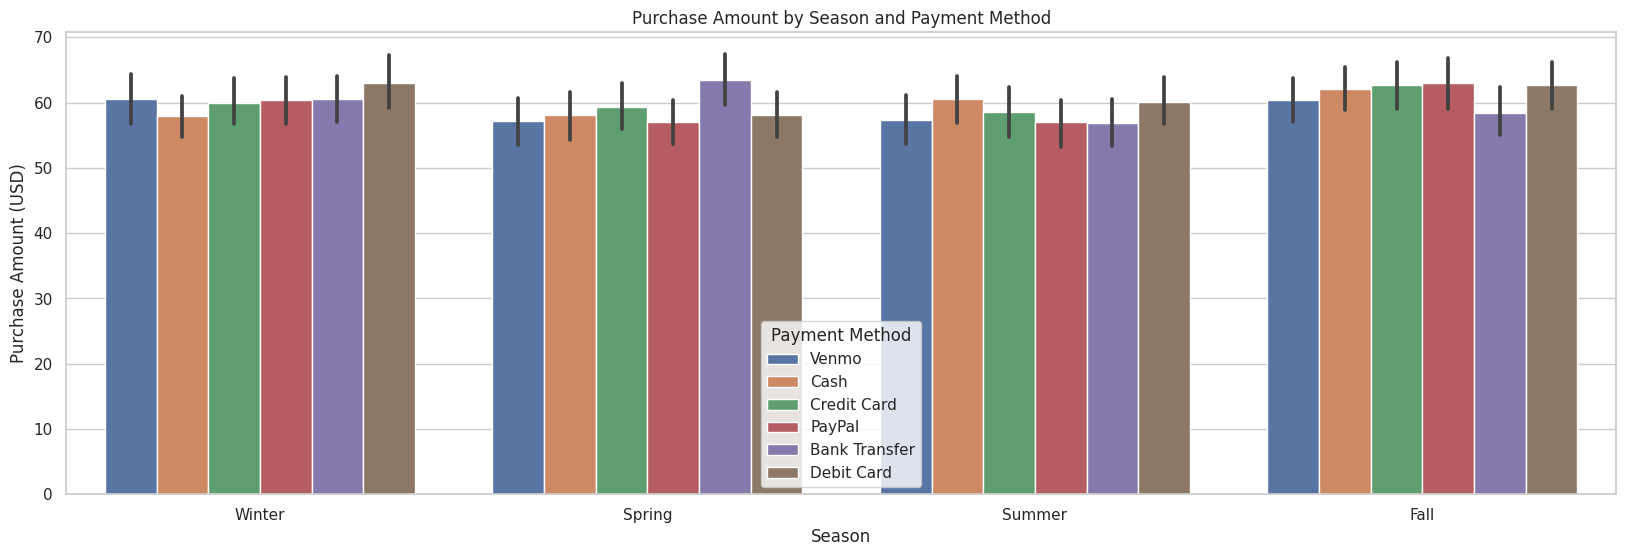

In [42]:
# Bar Plot of Payment Method by Season
plt.figure(figsize=(20, 6))
sns.barplot(x='Season', y='Purchase Amount (USD)', hue='Payment Method', data=df)
plt.title('Purchase Amount by Season and Payment Method')
plt.xlabel('Season')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation = 0)
plt.show()

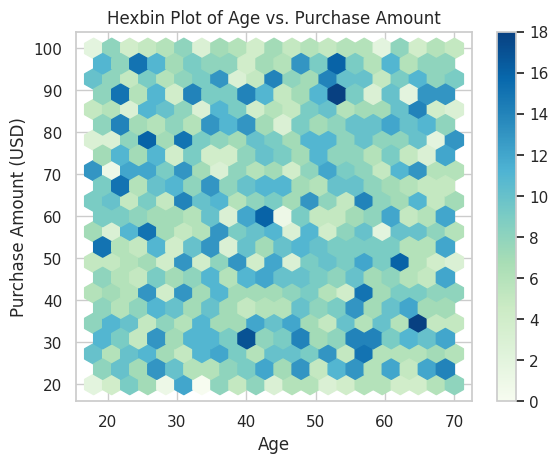

In [43]:
# Hexbin Plot of Age vs. Purchase Amount
plt.hexbin(df['Age'], df['Purchase Amount (USD)'], gridsize=20, cmap='GnBu')
plt.title('Hexbin Plot of Age vs. Purchase Amount')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.colorbar()
plt.show()

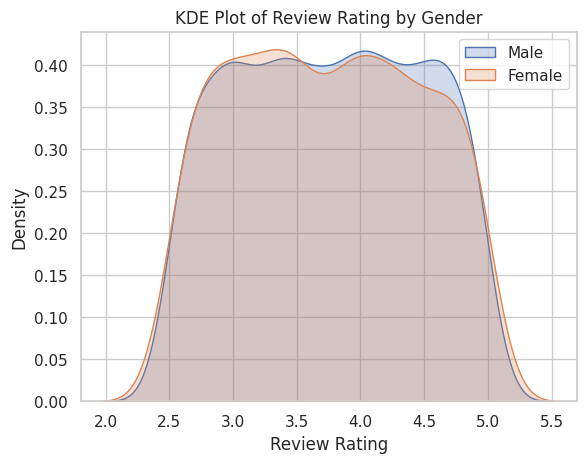

In [44]:
# KDE Plot of Review Rating by Gender
sns.kdeplot(df[df['Gender'] == 'Male']['Review Rating'], label='Male', shade=True)
sns.kdeplot(df[df['Gender'] == 'Female']['Review Rating'], label='Female', shade=True)
plt.title('KDE Plot of Review Rating by Gender')
plt.xlabel('Review Rating')
plt.ylabel('Density')
plt.legend()
plt.show()

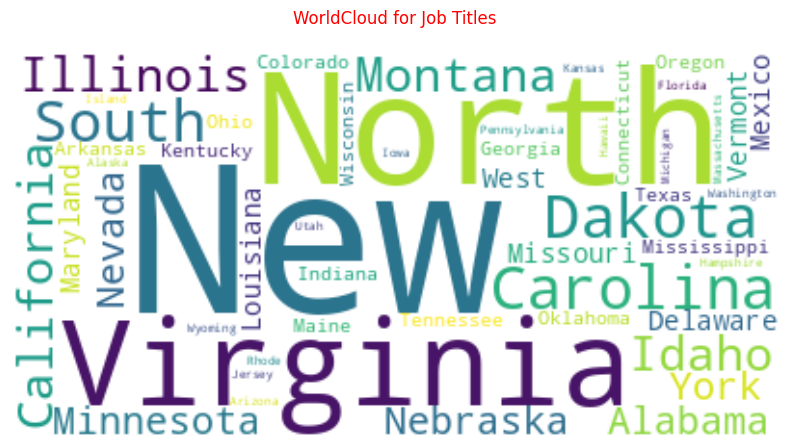

In [45]:
text = " ".join(title for title in df["Location"])
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize = (20, 5))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis("off")
plt.title('WorldCloud for Job Titles\n', fontsize = 12, color = "#FF0000")
plt.show()

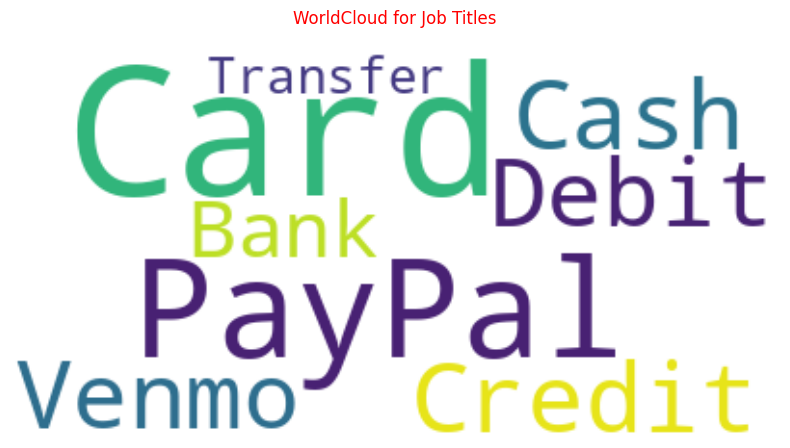

In [46]:
text = " ".join(title for title in df["Payment Method"])
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize = (20, 5))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis("off")
plt.title('WorldCloud for Job Titles\n', fontsize = 12, color = "#FF0000")
plt.show()

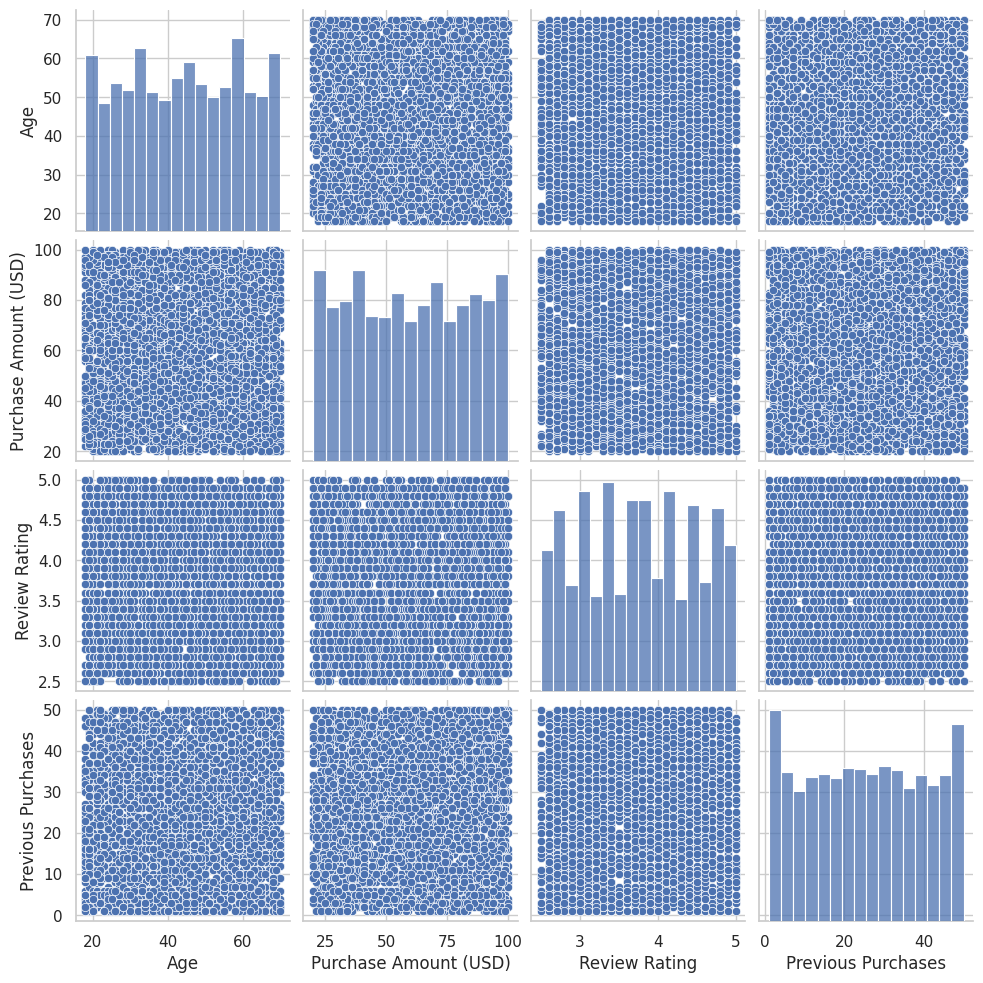

In [47]:
#  Pair Plot for Numerical Variables:
sns.pairplot(df[['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']])
plt.show()

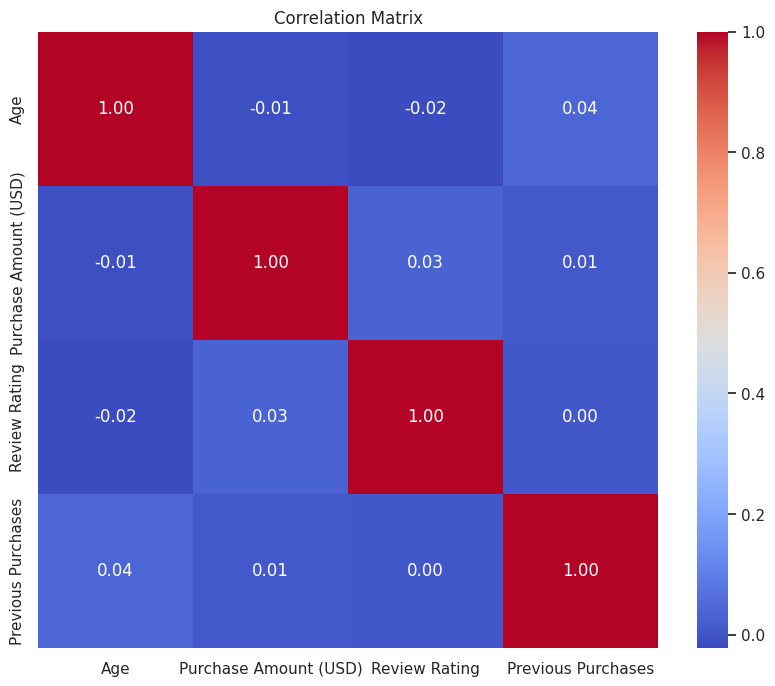

In [48]:
# Heatmap for Correlation Matrix:
correlation_matrix = df[['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# Valuable Insights

In [49]:
average_age = df['Age'].mean()
print("Average Age:", average_age)

most_common_item = df['Item Purchased'].mode()[0]
print("Most Common Item Purchased:", most_common_item)

total_purchase_by_category = df.groupby('Category')['Purchase Amount (USD)'].sum()
print("Total Purchase Amount by Category:")
print(total_purchase_by_category)

Average Age: 44.06846153846154
Most Common Item Purchased: Blouse
Total Purchase Amount by Category:
Category
Accessories     74200
Clothing       104264
Footwear        36093
Outerwear       18524
Name: Purchase Amount (USD), dtype: int64


In [50]:
average_rating_male = df[df['Gender'] == 'Male']['Review Rating'].mean()
average_rating_female = df[df['Gender'] == 'Female']['Review Rating'].mean()
print("Average Review Rating for Male Customers:", average_rating_male)
print("Average Review Rating for Female Customers:", average_rating_female)

Average Review Rating for Male Customers: 3.7539592760180995
Average Review Rating for Female Customers: 3.741426282051282


In [51]:
most_common_payment_method = df['Payment Method'].mode()[0]
print("Most Common Payment Method:", most_common_payment_method)

Most Common Payment Method: PayPal


In [52]:
median_purchase_amount = df['Purchase Amount (USD)'].median()
print("Median Purchase Amount (USD):", median_purchase_amount)

Median Purchase Amount (USD): 60.0


In [53]:
most_common_season = df['Season'].mode()[0]
print("Most Common Season for Purchases:", most_common_season)

Most Common Season for Purchases: Spring


In [54]:
total_purchase_by_gender = df.groupby('Gender')['Purchase Amount (USD)'].sum()
print("Total Purchase Amount by Gender:")
print(total_purchase_by_gender)

Total Purchase Amount by Gender:
Gender
Female     75191
Male      157890
Name: Purchase Amount (USD), dtype: int64


In [55]:
max_review_rating = df['Review Rating'].max()
min_review_rating = df['Review Rating'].min()
print("Maximum Review Rating:", max_review_rating)
print("Minimum Review Rating:", min_review_rating)

Maximum Review Rating: 5.0
Minimum Review Rating: 2.5


In [56]:
common_shipping_high_rating = df[df['Review Rating'] > 4]['Shipping Type'].mode()[0]
print("Most Common Shipping Type for High Review Ratings:", common_shipping_high_rating)

Most Common Shipping Type for High Review Ratings: Standard


In [57]:
total_purchase_by_location = df.groupby('Location')['Purchase Amount (USD)'].sum()
print("Total Purchase Amount by Location:")
print(total_purchase_by_location)

Total Purchase Amount by Location:
Location
Alabama           5261
Alaska            4867
Arizona           4326
Arkansas          4828
California        5605
Colorado          4222
Connecticut       4226
Delaware          4758
Florida           3798
Georgia           4645
Hawaii            3752
Idaho             5587
Illinois          5617
Indiana           4655
Iowa              4201
Kansas            3437
Kentucky          4402
Louisiana         4848
Maine             4388
Maryland          4795
Massachusetts     4384
Michigan          4533
Minnesota         4977
Mississippi       4883
Missouri          4691
Montana           5784
Nebraska          5172
Nevada            5514
New Hampshire     4219
New Jersey        3802
New Mexico        5014
New York          5257
North Carolina    4742
North Dakota      5220
Ohio              4649
Oklahoma          4376
Oregon            4243
Pennsylvania      4926
Rhode Island      3871
South Carolina    4439
South Dakota      4236
Tennessee    

In [58]:
correlation_age_previous_purchases = df['Age'].corr(df['Previous Purchases'], method='pearson')
print("Pearson Correlation between Age and Previous Purchases:", correlation_age_previous_purchases)

Pearson Correlation between Age and Previous Purchases: 0.04044453114289462


In [59]:
common_location_socks_discount = df[(df['Item Purchased'] == 'Socks') & (df['Discount Applied'] == 'Yes')]['Location'].mode()[0]
print("Most Common Location for Socks Purchases with Discount Applied:", common_location_socks_discount)

Most Common Location for Socks Purchases with Discount Applied: Georgia


In [60]:
total_purchase_by_size = df[df['Category'] == 'Clothing'].groupby('Size')['Purchase Amount (USD)'].sum()
print("Total Purchase Amount by Size for Clothing Items:")
print(total_purchase_by_size)

Total Purchase Amount by Size for Clothing Items:
Size
L     27864
M     47041
S     17416
XL    11943
Name: Purchase Amount (USD), dtype: int64


In [61]:
correlation_matrix

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
Age,1.000000,-0.010424,-0.021949,0.040445
Purchase Amount (USD),-0.010424,1.000000,0.030776,0.008063
Review Rating,-0.021949,0.030776,1.000000,0.004229
Previous Purchases,0.040445,0.008063,0.004229,1.000000


# **Customer Churn Prediction**

In [62]:
# Drop irrelevant columns for the prediction
df_churn = df.drop(['Item Purchased', 'Size',
                    'Color', 'Promo Code Used', 'Payment Method'], axis=1)

In [63]:
# Convert categorical columns to numerical using Label Encoding
label_encoder = LabelEncoder()
df_churn['Gender'] = label_encoder.fit_transform(df_churn['Gender'])
df_churn['Location'] = label_encoder.fit_transform(df_churn['Location'])
df_churn['Subscription Status'] = label_encoder.fit_transform(df_churn['Subscription Status'])
df_churn['Shipping Type'] = label_encoder.fit_transform(df_churn['Shipping Type'])
df_churn['Discount Applied'] = label_encoder.fit_transform(df_churn['Discount Applied'])
df_churn['Season'] = label_encoder.fit_transform(df_churn['Season'])
df_churn['Category'] = label_encoder.fit_transform(df_churn['Category'])

In [64]:
# One-hot encode 'Frequency of Purchases'
df_churn = pd.get_dummies(df_churn, columns=['Frequency of Purchases'], drop_first=True)

In [65]:
# Split the data into features (X) and target variable (y)
X = df_churn.drop('Subscription Status', axis=1)
y = df_churn['Subscription Status']

In [66]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize and train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

In [68]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [69]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:\n', conf_matrix)
print('\nClassification Report:\n', class_report)

Accuracy: 1.00

Confusion Matrix:
 [[558   0]
 [  0 222]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       558
           1       1.00      1.00      1.00       222

    accuracy                           1.00       780
   macro avg       1.00      1.00      1.00       780
weighted avg       1.00      1.00      1.00       780



In [70]:
# Make predictions on the test set with probabilities
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]

# Threshold probabilities to get binary predictions
threshold = 0.5  # Adjust the threshold as needed
y_pred_binary = (y_pred_proba > threshold).astype(int)

In [71]:
# Check Overfitting/Imbalance/other issues
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)  # Assuming you have predicted probabilities (y_pred_proba)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')


Precision: 1.00
Recall: 1.00
F1-score: 1.00
ROC AUC: 1.00


In [72]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
cv_scores = cross_val_score(rf_classifier, X, y, cv=5)  # 5-fold cross-validation

# Print the cross-validated scores
print("Cross-validated scores:", cv_scores)

Cross-validated scores: [0.63461538 1.         1.         1.         0.86538462]


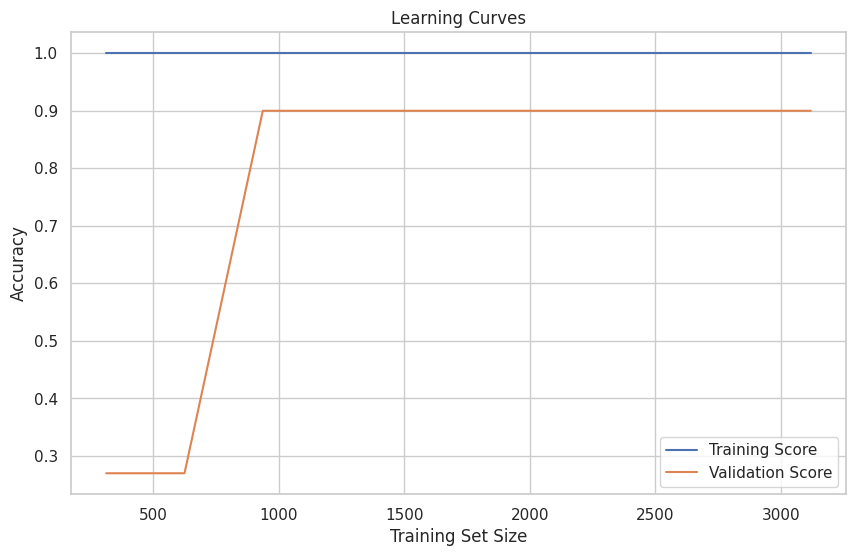

In [73]:
train_sizes, train_scores, test_scores = learning_curve(
    RandomForestClassifier(n_estimators=100, random_state=42),
    X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.show()

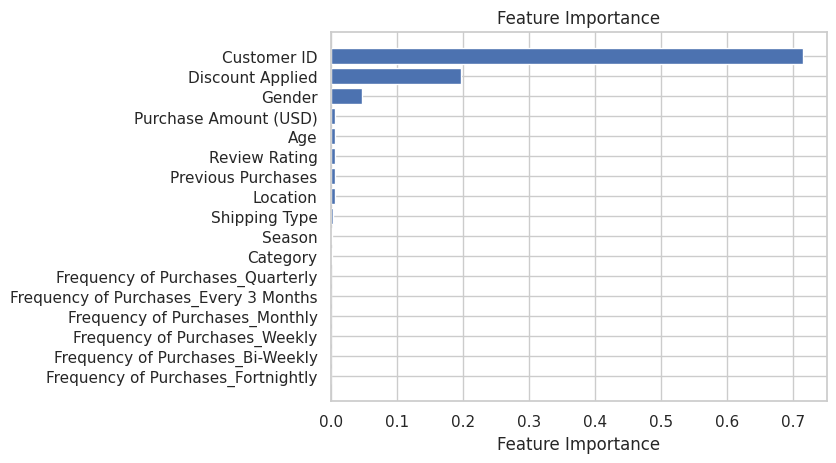

In [74]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

feature_importances = rf_classifier.feature_importances_
sorted_idx = np.argsort(feature_importances)

# Plot feature importances
plt.barh(range(X.shape[1]), feature_importances[sorted_idx])
plt.yticks(range(X.shape[1]), X.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance')
plt.show()